# Capstone Project - The Battle of the Neighborhoods (Week 2)

## A. Introduction / Business Problem

Obesity is a common and serious issue in United States. According to World Atlas, a website that covers demography and sociology topics all over the world, the most obese country in North America is the United States.  
  
Recent years, US citizens have been paying more attention to healthy lifestyle. People are more willing to spend more money in eating healthy food and to live a healthy life. These include spending money in sport activities, signing up for gym membership and hiring of personal trainer.  
  
This provides opportunities for businesses that are offering **fitness service**, including **gym and fitness center**. United States is a big country and it has a huge population. United States is also a developed country. Majority of the citizens are able to spend their earning income in areas beside of necessities.  
  
However, United States is such a big country and it is illogical to open new business in every single state, especially for small company and new entrepreneur. Thus, it is very important for us to conduct research before venturing into our **Gym Business**. With limited resources, we want our target audience to target only the states with the highest opportunities. 
  
Since **population** is one of the most important factors in determining a successful gym business, we will prepare population data of each city in United States.  
  
Some of the audiences that we are targeting are small **business personnel** who likes to venture into gym business and **medium enterprise** which wants to take advantage of **gym franchises**.
  
In this project, we will use **Foursquare data** to obtain some of the most common venues within our targeted cities. 

## B. Data Preparation

Referring to our problem, factors that will influence the business decission are:
* city population
* per capita income of each city  
  
#### 1. Get the list of United States cities and City Population.  
The wikipedia article of "List of United States cities by population" provides  the table of United States cities, sorted in order by the city population.  
  
We use BeatifulSoup4 to scrape the table data from the article. We also scrape other data such as population density and land area. Cleaning is required to ensure a neat and useful table. We drop some columns and rename some of the column names. Then, we use pandas library to create the dataframe.   
  
[link to Wikipedia](https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population)  
  
#### 2. Get the coordinates of the targeted cities.  
Since the population is one of the most important factors in determining a successful gym business, we narrow down our list of cities and only targeted on the three cities that are most populated in United States. Then, we use Geopy library to get the coordinates of these cities. After getting the coordinates, we double check with google search result to ensure the accurateness of the coordinates.  
  
#### 3. Get the Per capita Income Data.  
We scrape the data of Per capita Income from the wikipedia article "List of United States counties by per capita income". Per capita income is also one of the important factors in determining a successful gym business. When the income level is high enough, people are willing to spend extra moneny in fitness activities.  
  
[link to Wikipedia](https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income)  
  
#### 4. Foursquare Data  
We also use Foursquare Data to get some of the most common venues that can be found in our targeted cities. 

#### Import required libraries.

In [1]:
# import libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

from geopy.geocoders import Nominatim
import matplotlib.colors as colors
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import folium

#### Get population data for US cities.

In [2]:
# get population data

res = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table',class_='wikitable sortable') 
df = pd.read_html(str(table))
print(df[0].to_json(orient='records'))

[{"2018rank":1,"City":"New York[d]","State[c]":"New York","2018estimate":8398748,"2010Census":8175133,"Change":"+2.74%","2016 land area":"301.5\u00a0sq\u00a0mi","2016 land area.1":"780.9\u00a0km2","2016 population density":"28,317\/sq\u00a0mi","2016 population density.1":"10,933\/km2","Location":"40\u00b039\u203249\u2033N 73\u00b056\u203219\u2033W\ufeff \/ \ufeff40.6635\u00b0N 73.9387\u00b0W"},{"2018rank":2,"City":"Los Angeles","State[c]":"California","2018estimate":3990456,"2010Census":3792621,"Change":"+5.22%","2016 land area":"468.7\u00a0sq\u00a0mi","2016 land area.1":"1,213.9\u00a0km2","2016 population density":"8,484\/sq\u00a0mi","2016 population density.1":"3,276\/km2","Location":"34\u00b001\u203210\u2033N 118\u00b024\u203239\u2033W\ufeff \/ \ufeff34.0194\u00b0N 118.4108\u00b0W"},{"2018rank":3,"City":"Chicago","State[c]":"Illinois","2018estimate":2705994,"2010Census":2695598,"Change":"+0.39%","2016 land area":"227.3\u00a0sq\u00a0mi","2016 land area.1":"588.7\u00a0km2","2016 popul

In [3]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table',class_='wikitable sortable') 
df = pd.read_html(str(table))[0]
cities = df["City"].tolist()
population18 = df["2018estimate"].tolist()
population10 = df["2010Census"].tolist()
landArea = df["2016 land area.1"].tolist()
density = df["2016 population density.1"].tolist()

In [4]:
df.head()

,2018rank,City,State[c],2018estimate,2010Census,Change,2016 land area,2016 land area.1,2016 population density,2016 population density.1,Location
0,1,New York[d],New York,8398748,8175133,+2.74%,301.5 sq mi,780.9 km2,"28,317/sq mi","10,933/km2",40°39′49″N 73°56′19″W﻿ / ﻿40.6635°N 73.9387°W
1,2,Los Angeles,California,3990456,3792621,+5.22%,468.7 sq mi,"1,213.9 km2","8,484/sq mi","3,276/km2",34°01′10″N 118°24′39″W﻿ / ﻿34.0194°N 118.4108°W
2,3,Chicago,Illinois,2705994,2695598,+0.39%,227.3 sq mi,588.7 km2,"11,900/sq mi","4,600/km2",41°50′15″N 87°40′54″W﻿ / ﻿41.8376°N 87.6818°W
3,4,Houston[3],Texas,2325502,2100263,+10.72%,637.5 sq mi,"1,651.1 km2","3,613/sq mi","1,395/km2",29°47′12″N 95°23′27″W﻿ / ﻿29.7866°N 95.3909°W
4,5,Phoenix,Arizona,1660272,1445632,+14.85%,517.6 sq mi,"1,340.6 km2","3,120/sq mi","1,200/km2",33°34′20″N 112°05′24″W﻿ / ﻿33.5722°N 112.0901°W


In [5]:
# Delete unwanted columns from the dataframe
df = df.drop(["Change", "2016 land area", "2016 population density","Location"], axis=1)
df.to_csv('Course_US_Population.csv')
df.head()

,2018rank,City,State[c],2018estimate,2010Census,2016 land area.1,2016 population density.1
0,1,New York[d],New York,8398748,8175133,780.9 km2,"10,933/km2"
1,2,Los Angeles,California,3990456,3792621,"1,213.9 km2","3,276/km2"
2,3,Chicago,Illinois,2705994,2695598,588.7 km2,"4,600/km2"
3,4,Houston[3],Texas,2325502,2100263,"1,651.1 km2","1,395/km2"
4,5,Phoenix,Arizona,1660272,1445632,"1,340.6 km2","1,200/km2"


#### Since population is one of the most important factors in determining a successful gym business, we narrow down our shortlisted cities to the top 3 most populated cities.

In [6]:
# keep top 3 most populated cities
df_3City = df[:3]
df_3City

,2018rank,City,State[c],2018estimate,2010Census,2016 land area.1,2016 population density.1
0,1,New York[d],New York,8398748,8175133,780.9 km2,"10,933/km2"
1,2,Los Angeles,California,3990456,3792621,"1,213.9 km2","3,276/km2"
2,3,Chicago,Illinois,2705994,2695598,588.7 km2,"4,600/km2"


#### Get coordinates for the three cities.

In [7]:
nom = Nominatim()
ny = nom.geocode("New York")
la = nom.geocode("Los Angeles")
ch = nom.geocode("Chicago")

latitude = [ny.latitude,la.latitude,ch.latitude]
df_3City['Latitude'] = latitude
longitude = [ny.longitude,la.longitude,ch.longitude]
df_3City['Longitude'] = longitude
df_3City

E:\AC\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """Entry point for launching an IPython kernel.
E:\AC\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\AC\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying

,2018rank,City,State[c],2018estimate,2010Census,2016 land area.1,2016 population density.1,Latitude,Longitude
0,1,New York[d],New York,8398748,8175133,780.9 km2,"10,933/km2",40.712728,-74.006015
1,2,Los Angeles,California,3990456,3792621,"1,213.9 km2","3,276/km2",34.053691,-118.242767
2,3,Chicago,Illinois,2705994,2695598,588.7 km2,"4,600/km2",41.875562,-87.624421


#### After getting population data and coordinates, let's get Per Capita Income data for US cities. City with higer per capita income will have citizens who are more willing to spend money on other areas, since they have no issues with fulfilling their basic needs.

In [8]:
# get per capita income data

res1 = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income")
soup = BeautifulSoup(res1.content,'lxml')
table_income = soup.find_all('table')[2]
df_income = pd.read_html(str(table_income))
print(df_income[0].to_json(orient='records'))

[{"Rank":"1","County or county-equivalent":"New York County","State, federal district or territory":"New York","Per capitaincome":"$62,498","Medianhouseholdincome":"$69,659","Medianfamilyincome":"$84,627","Population":1605272.0,"Number ofhouseholds":736192.0},{"Rank":"2","County or county-equivalent":"Arlington","State, federal district or territory":"Virginia","Per capitaincome":"$62,018","Medianhouseholdincome":"$103,208","Medianfamilyincome":"$139,244","Population":214861.0,"Number ofhouseholds":94454.0},{"Rank":"3","County or county-equivalent":"Falls Church City","State, federal district or territory":"Virginia","Per capitaincome":"$59,088","Medianhouseholdincome":"$120,000","Medianfamilyincome":"$152,857","Population":12731.0,"Number ofhouseholds":5020.0},{"Rank":"4","County or county-equivalent":"Marin","State, federal district or territory":"California","Per capitaincome":"$56,791","Medianhouseholdincome":"$90,839","Medianfamilyincome":"$117,357","Population":254643.0,"Number o

In [9]:
res1 = requests.get("https://en.wikipedia.org/wiki/List_of_United_States_counties_by_per_capita_income")
soup = BeautifulSoup(res1.content,'lxml')
table_income = soup.find_all('table')[2] 
df_income = pd.read_html(str(table_income))[0]
city2 = df_income["County or county-equivalent"].tolist()
income2 = df_income["Per capitaincome"].tolist()

In [10]:
# Delete multiple columns from the dataframe
df_income = df_income.drop(["Rank", "State, federal district or territory", "Medianhouseholdincome","Medianfamilyincome","Population","Number ofhouseholds"], axis=1)
df_income.head()

,County or county-equivalent,Per capitaincome
0,New York County,"$62,498"
1,Arlington,"$62,018"
2,Falls Church City,"$59,088"
3,Marin,"$56,791"
4,Alexandria City,"$54,608"


In [11]:
df_PerCapita = df_income.rename(columns={'County or county-equivalent':'City','Per capitaincome':'Per Capita Income'})
df_PerCapita.head()

,City,Per Capita Income
0,New York County,"$62,498"
1,Arlington,"$62,018"
2,Falls Church City,"$59,088"
3,Marin,"$56,791"
4,Alexandria City,"$54,608"


#### Chicago, which is located in the Illinois state, is in the county of Cook.

In [12]:
df_PerCapita2 = df_PerCapita[:-2743]

df_PerCapita3 = df_PerCapita2.drop(df_PerCapita2.index[1:330])

df_PerCapita4 = df_PerCapita3.drop(df_PerCapita2.index[331:553])
df_PerCapita4

,City,Per Capita Income
0,New York County,"$62,498"
330,Cook,"$30,183"
553,Los Angeles,"$27,749"


#### Add the per capita income column to the DataFrame. Now, we have the complete dataframe containing population data, per capita income and coordinates of our selected top three cities.

In [13]:
df_3City.insert(7,"Per Capita Income",['$62,498','$27,749','$30,183'],True)
df_3City.to_csv('Course_US_City3.csv')
df_3City

,2018rank,City,State[c],2018estimate,2010Census,2016 land area.1,2016 population density.1,Per Capita Income,Latitude,Longitude
0,1,New York[d],New York,8398748,8175133,780.9 km2,"10,933/km2","$62,498",40.712728,-74.006015
1,2,Los Angeles,California,3990456,3792621,"1,213.9 km2","3,276/km2","$27,749",34.053691,-118.242767
2,3,Chicago,Illinois,2705994,2695598,588.7 km2,"4,600/km2","$30,183",41.875562,-87.624421


#### Get US Latitude and Longitude.

In [14]:
address = 'United States'

geolocator = Nominatim(user_agent="US_explorer")
location = geolocator.geocode(address)
US_latitude = location.latitude
US_longitude = location.longitude
print('The geograpical coordinates of US are {}, {}.'.format(US_latitude, US_longitude))

The geograpical coordinates of US are 39.7837304, -100.4458825.


#### Show the top 3 most populated cities on the map.

In [15]:
Top3 = folium.Map(location=[US_latitude, US_longitude], zoom_start=4)

# add markers to map
for lat, lng, label in zip(df_3City['Latitude'], df_3City['Longitude'], 
                           df_3City['City']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=9,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(Top3)  
    
Top3

# C. Methodology

After collecting all the required data, let's take about methodology.  
  
In this project, we will make full use of Foursquare API. We will start by exploring some of the most visited venues in the three cities. We want to check whether gym is one of the most visited venues. Then, we will look for number of gyms in each city. We will also use Hot Encoding to get more information about the venue categories of each city.

# D. Analysis

We perform some basic explanatory data analysis, mainly using Foursquare API.

#### Foursquare API

In [16]:
CLIENT_ID = '2MBLWPCF03MPNX50MJBLOD1LIJZRYU3NIAWB4GUVCMX3FPQ1' # your Foursquare ID
CLIENT_SECRET = 'UEMUQIT4POBRNMAZ4Y1Y1N3EYBIM12D1MCBY5RBNWBY3PY34' # your Foursquare Secret
VERSION = '20180604'
print('My credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

My credentails:
CLIENT_ID: 2MBLWPCF03MPNX50MJBLOD1LIJZRYU3NIAWB4GUVCMX3FPQ1
CLIENT_SECRET:UEMUQIT4POBRNMAZ4Y1Y1N3EYBIM12D1MCBY5RBNWBY3PY34


#### Explore the areas around the three most populated cities.

In [17]:
radius = 100000
LIMIT = 100

def getNearbyVenues(names, latitudes, longitudes, radius=100000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Create a dataframe containing data of the venues around the 3 cities.

In [18]:
Top3 = getNearbyVenues(names=df_3City['City'],
                       latitudes=df_3City['Latitude'],
                       longitudes=df_3City['Longitude']
                      )       

New York[d]
Los Angeles
Chicago


In [19]:
print ("Shape of the Venues Dataframe: ", Top3.shape)
Top3.to_csv('Course_top3.csv')
Top3.head()

Shape of the Venues Dataframe:  (300, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,New York[d],40.712728,-74.006015,Aire Ancient Baths,40.718141,-74.004941,Spa
1,New York[d],40.712728,-74.006015,The Bar Room at Temple Court,40.711448,-74.006802,Hotel Bar
2,New York[d],40.712728,-74.006015,Arcade Bakery,40.717072,-74.006605,Bakery
3,New York[d],40.712728,-74.006015,9/11 Memorial North Pool,40.712077,-74.013187,Memorial Site
4,New York[d],40.712728,-74.006015,Washington Market Park,40.717046,-74.011095,Playground


#### Since this is research for Gym Business, we are targeting on the gyms.

In [20]:
# Create dataframe to focus on gyms

Top3_only_gym = Top3[Top3['Venue Category']\
                     .str.contains('Gym')].reset_index(drop=True)
                                                          
Top3_only_gym.index = np.arange(1, len(Top3_only_gym)+1)
print ("Shape of the Data-Frame with Venue Category only Gym: ", Top3_only_gym.shape)
Top3_only_gym.head(15)

Shape of the Data-Frame with Venue Category only Gym:  (11, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,New York[d],40.712728,-74.006015,Barry's Bootcamp NoHo,40.728937,-73.992241,Gym
2,New York[d],40.712728,-74.006015,The Fhitting Room,40.739857,-73.993194,Gym
3,New York[d],40.712728,-74.006015,Equinox Gramercy,40.740749,-73.985771,Gym
4,New York[d],40.712728,-74.006015,"iLoveKickboxing - Chelsea, NY",40.746340,-73.992900,Gym
5,New York[d],40.712728,-74.006015,305 Fitness MIDTOWN,40.746790,-73.982885,Gym / Fitness Center
6,Los Angeles,34.053691,-118.242767,LA Boulders,34.038892,-118.234508,Climbing Gym
7,Los Angeles,34.053691,-118.242767,Equinox Hollywood,34.099440,-118.326627,Gym
8,Los Angeles,34.053691,-118.242767,Cliffs of Id,34.032957,-118.370943,Climbing Gym
9,Los Angeles,34.053691,-118.242767,Los Angeles School of Gymnastics,34.022020,-118.379456,Gymnastics Gym
10,Chicago,41.875562,-87.624421,Studio Three,41.893999,-87.631373,Gym / Fitness Center


#### There are a total of 11gyms in the three cities.

In [21]:
## Show in Map the Top Rated Gyms in the Top 3 Cities

map_gyms = folium.Map(location=[US_latitude, US_longitude], zoom_start=4, tiles="openstreetmap",
                      attr="<a href=https://github.com/python-visualization/folium/>Folium</a>")
                            

# set color scheme for the Venues based on the Cities
Cities = ['New York[d]', 'Los Angeles', 'Chicago']

x = np.arange(len(Cities))

rainbow = ['#00ff00','#ffa500' ,'#ff0000']

markers_colors = []

for lat, lon, poi, distr in zip(Top3_only_gym['Venue Latitude'],
                                Top3_only_gym['Venue Longitude'],
                                Top3_only_gym['Venue Category'],
                                Top3_only_gym['Neighborhood']):
    label = folium.Popup(str(poi) + ' ' + str(distr), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=7,
        popup=label,
        color=rainbow[Cities.index(distr)-1],
        fill=True,
        fill_color=rainbow[Cities.index(distr)-1],
        fill_opacity=0.3).add_to(map_gyms)
    
map_gyms

#### The most frequently visited venues.

In [22]:
### Number of Unique Categories in the dataframe
print('A total of {} unique categories.'.format(len(Top3['Venue Category'].unique())))
## check categories randomly  
print (Top3[['Venue Category']])

A total of 116 unique categories.
               Venue Category
0                         Spa
1                   Hotel Bar
2                      Bakery
3               Memorial Site
4                  Playground
5                  Restaurant
6                        Park
7      Furniture / Home Store
8                 Music Venue
9                    Building
10                       Park
11                     Bridge
12                       Park
13                       Park
14        Indie Movie Theater
15                       Park
16                   Wine Bar
17             Scenic Lookout
18                      Beach
19             Chocolate Shop
20   Mediterranean Restaurant
21                     Garden
22           Volleyball Court
23                       Park
24                  Bookstore
25             Pilates Studio
26                  Wine Shop
27                       Pier
28                Cheese Shop
29                      Trail
..                        ...
270   

#### There are 116 unique categories in the dataframe. Find the frequency of each category.

In [23]:
print (Top3['Venue Category'].value_counts())

Park                          28
Hotel                         17
Theater                        9
Trail                          8
Yoga Studio                    7
Ice Cream Shop                 7
Bookstore                      7
Art Gallery                    6
Gym                            6
Italian Restaurant             6
Coffee Shop                    6
Mediterranean Restaurant       5
Farmers Market                 4
Cycle Studio                   4
Deli / Bodega                  4
Sandwich Place                 4
Wine Shop                      4
Liquor Store                   4
Scenic Lookout                 4
Theme Park                     4
Garden                         4
Pizza Place                    4
Sushi Restaurant               4
Grocery Store                  3
Concert Hall                   3
Music Venue                    3
Bakery                         3
Movie Theater                  3
Café                           3
Seafood Restaurant             3
          

In [24]:
# create a dataframe of top 12 categories
Top3_Top12 = Top3['Venue Category'].value_counts()[0:12].to_frame(name='frequency')
Top3_Top12=Top3_Top12.reset_index()
Top3_Top12

Top3_Top12.rename(index=str, columns={"index": "Venue Category", "frequency": "Frequency"}, inplace=True)
Top3_Top12

,Venue Category,Frequency
0,Park,28
1,Hotel,17
2,Theater,9
3,Trail,8
4,Yoga Studio,7
5,Ice Cream Shop,7
6,Bookstore,7
7,Art Gallery,6
8,Gym,6
9,Italian Restaurant,6


#### There should be a total of 11 gyms in the three cities according to the previous finding.

In [25]:
# change gym frequency to 11.

Top3_Top12.iat[8,1] = 11
Top3_Top12

,Venue Category,Frequency
0,Park,28
1,Hotel,17
2,Theater,9
3,Trail,8
4,Yoga Studio,7
5,Ice Cream Shop,7
6,Bookstore,7
7,Art Gallery,6
8,Gym,11
9,Italian Restaurant,6


In [26]:
sort_by_freq = Top3_Top12.sort_values('Frequency',ascending=False)
sort_by_freq

,Venue Category,Frequency
0,Park,28
1,Hotel,17
8,Gym,11
2,Theater,9
3,Trail,8
4,Yoga Studio,7
5,Ice Cream Shop,7
6,Bookstore,7
7,Art Gallery,6
9,Italian Restaurant,6


#### Show the top 12 venues in the three cities with Bar Chart.

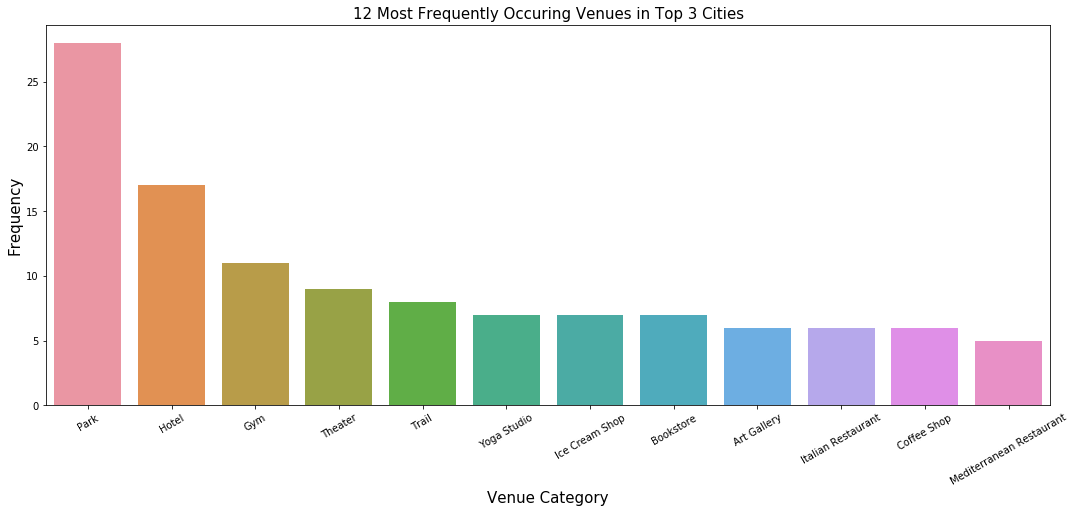

In [27]:
import seaborn as sns
fig = plt.figure(figsize=(18,7))
s=sns.barplot(x="Venue Category", y="Frequency", data=sort_by_freq)
s.set_xticklabels(s.get_xticklabels(), rotation=30)
plt.title('12 Most Frequently Occuring Venues in Top 3 Cities', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues.png", dpi=300)
plt.show()

#### Looking at the bar chart above, we can find that gym is the third most frequently occuring venues in the three cities. Beside of gym, we also find that the park is the top occuring venues and yoga studio is the sixth most occuring venues.  This tells us that citizens of the three cities are paying attention to their healthy lifestyle, where they will visit parks, gyms and yoga studios. 

#### More information about the venues.

In [28]:
### Use One Hot Encoding to Get More Information about the Venue Categories 
Top3_onehot = pd.get_dummies(Top3[['Venue Category']], prefix="", prefix_sep="")

### add city column back to dataframe
Top3_onehot['Neighborhood'] = Top3['Neighborhood'] 
### move district column to the first column
fixed_columns = [Top3_onehot.columns[-1]] + list(Top3_onehot.columns[:-1])
Top3_onehot = Top3_onehot[fixed_columns]

Top3_onehot.head()

,Neighborhood,Amphitheater,Art Gallery,Art Museum,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,...,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Volleyball Court,Waterfront,Wine Bar,Wine Shop,Yoga Studio
0,New York[d],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,New York[d],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,New York[d],0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,New York[d],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,New York[d],0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
Top3_Grouped = Top3_onehot.groupby('Neighborhood').mean().reset_index()
Top3_Grouped.index = np.arange(1, len(Top3_Grouped)+1)
Top3_Grouped

,Neighborhood,Amphitheater,Art Gallery,Art Museum,Athletics & Sports,BBQ Joint,Bakery,Bar,Beach,Beer Bar,...,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Trail,Volleyball Court,Waterfront,Wine Bar,Wine Shop,Yoga Studio
1,Chicago,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.01,0.00,...,0.00,0.05,0.00,0.00,0.02,0.00,0.02,0.00,0.00,0.04
2,Los Angeles,0.00,0.02,0.02,0.00,0.00,0.02,0.00,0.00,0.01,...,0.00,0.03,0.04,0.03,0.05,0.00,0.00,0.01,0.02,0.01
3,New York[d],0.00,0.03,0.00,0.01,0.00,0.01,0.00,0.01,0.00,...,0.01,0.01,0.00,0.00,0.01,0.01,0.00,0.01,0.02,0.02


#### Print out the top 5 venues of each city.

In [30]:
num_top_venues = 5

for places in Top3_Grouped['Neighborhood']:
    print("%%%%%%%%%"+places+"%%%%%%%%")
    temp = Top3_Grouped[Top3_Grouped['Neighborhood'] == places].T.reset_index()
    temp.columns = ['Venue','Freq']
    temp = temp.iloc[1:]
    temp['Freq'] = temp['Freq'].astype(float)
    temp = temp.round({'Freq': 2})
    print(temp.sort_values('Freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

%%%%%%%%%Chicago%%%%%%%%
                Venue  Freq
0               Hotel  0.10
1                Park  0.06
2             Theater  0.05
3         Yoga Studio  0.04
4  Italian Restaurant  0.04


%%%%%%%%%Los Angeles%%%%%%%%
         Venue  Freq
0        Hotel  0.06
1        Trail  0.05
2         Park  0.04
3   Theme Park  0.04
4  Coffee Shop  0.03


%%%%%%%%%New York[d]%%%%%%%%
            Venue  Freq
0            Park  0.18
1       Bookstore  0.05
2             Gym  0.04
3  Scenic Lookout  0.03
4     Art Gallery  0.03




#### Looking at the top 5 venues of each city, park is one of the most visited venues in all three cities. However, only New York has gym as one of the top 5 visited venues.

#### Dataframe with Top 10 Venues for each city.

In [31]:
## select top 10 rows

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
City_top10_venues_sorted = pd.DataFrame(columns=columns)
City_top10_venues_sorted['Neighborhood'] = Top3_Grouped['Neighborhood']

for ind in np.arange(Top3_Grouped.shape[0]):
    City_top10_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Top3_Grouped.iloc[ind, :], num_top_venues)

    
City_top10_venues_sorted.index = np.arange(1, len(City_top10_venues_sorted)+1)
City_top10_venues_sorted.head(5)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chicago,Hotel,Park,Theater,Italian Restaurant,Yoga Studio,Liquor Store,Ice Cream Shop,Coffee Shop,Trail,Deli / Bodega
2,Los Angeles,Hotel,Trail,Theme Park,Park,Coffee Shop,Theme Park Ride / Attraction,Theater,Sushi Restaurant,General Entertainment,Farmers Market
3,New York[d],Park,Bookstore,Gym,Cycle Studio,Art Gallery,Scenic Lookout,Yoga Studio,Mediterranean Restaurant,Indie Movie Theater,Ice Cream Shop


#### Number of Gyms as Top Most Venues in the three cities.

<class 'pandas.core.series.Series'>
shape of the dataframe:  (3, 2)
          City  Number of Gym
1      Chicago              2
2  Los Angeles              4
3  New York[d]              5
<class 'pandas.core.frame.DataFrame'>
[2, 4, 5]


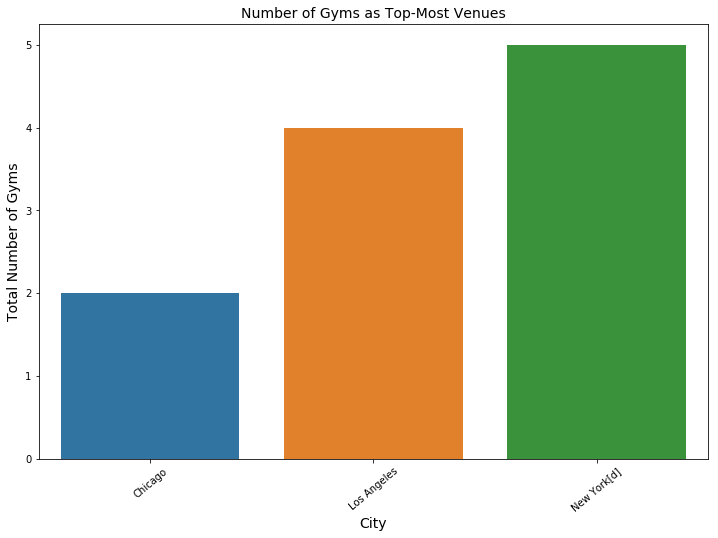

In [32]:
#try groupby to play with gym
Top3_gyms = Top3.groupby(['Neighborhood'])['Venue Category'].apply(lambda x: x[x.str.contains('Gym')].count())
Top3_gyms_df = Top3_gyms.to_frame().reset_index()
Top3_gyms_df.columns = ['City', 'Number of Gym']
print (type(Top3_gyms))

Top3_gyms_df.index = np.arange(1, len(Top3_gyms_df)+1)

print ("shape of the dataframe: ", Top3_gyms_df.shape)
print (Top3_gyms_df.head())
print (type(Top3_gyms_df[['Number of Gym']]))
list_gym_no = Top3_gyms_df['Number of Gym'].to_list()
print (list_gym_no)
fig = plt.figure(figsize=(12,8))
bar = sns.barplot(x='City', y='Number of Gym', data=Top3_gyms_df)

bar.set_ylabel("Total Number of Gyms", fontsize=14)
bar.set_xlabel("City", fontsize=14)
bar.set_xticklabels(bar.get_xticklabels(),rotation=40)
bar.set_title("Number of Gyms as Top-Most Venues", fontsize=14)
#plt.savefig("No_of_Rest_as_Top_Venues.png", dpi=240)
plt.show()

#### New York has the highest number of gyms.

#### Clustering the cities using K-Means.

In [33]:
# set number of clusters
kclusters = 2

TopCity_grouped_clustering = Top3_Grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TopCity_grouped_clustering)

# check cluster labels generated for each row in the dataframe
print ("Check the 2 Cluster labels :",  kmeans.labels_[0:5])

Check the 2 Cluster labels : [0 0 1]


In [36]:
City_top10_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)

City_Merged = df_3City

City_Merged = City_Merged.join(City_top10_venues_sorted.set_index('Neighborhood'), on='City')
City_Merged.head()

,2018rank,City,State[c],2018estimate,2010Census,2016 land area.1,2016 population density.1,Per Capita Income,Latitude,Longitude,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,New York[d],New York,8398748,8175133,780.9 km2,"10,933/km2","$62,498",40.712728,-74.006015,...,Park,Bookstore,Gym,Cycle Studio,Art Gallery,Scenic Lookout,Yoga Studio,Mediterranean Restaurant,Indie Movie Theater,Ice Cream Shop
1,2,Los Angeles,California,3990456,3792621,"1,213.9 km2","3,276/km2","$27,749",34.053691,-118.242767,...,Hotel,Trail,Theme Park,Park,Coffee Shop,Theme Park Ride / Attraction,Theater,Sushi Restaurant,General Entertainment,Farmers Market
2,3,Chicago,Illinois,2705994,2695598,588.7 km2,"4,600/km2","$30,183",41.875562,-87.624421,...,Hotel,Park,Theater,Italian Restaurant,Yoga Studio,Liquor Store,Ice Cream Shop,Coffee Shop,Trail,Deli / Bodega


In [37]:
# create map
map_clusters = folium.Map(location=[US_latitude, US_longitude], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(City_Merged['Latitude'], 
                                  City_Merged['Longitude'], 
                                  City_Merged['City'], 
                                  City_Merged['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
    
       
map_clusters

### Explore the two clusters.

#### Cluster 0

In [40]:
US_Cluster0 = City_Merged.loc[City_Merged['Cluster Label'] == 0,
                              City_Merged.columns[[1] + list(range(4, City_Merged.shape[1]))]]
                                    
print ("No of Neighbourhood in Cluster Label 0: %d" %(US_Cluster0.shape[0]))
US_Cluster0

No of Neighbourhood in Cluster Label 0: 2


,City,2010Census,2016 land area.1,2016 population density.1,Per Capita Income,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Los Angeles,3792621,"1,213.9 km2","3,276/km2","$27,749",34.053691,-118.242767,0,Hotel,Trail,Theme Park,Park,Coffee Shop,Theme Park Ride / Attraction,Theater,Sushi Restaurant,General Entertainment,Farmers Market
2,Chicago,2695598,588.7 km2,"4,600/km2","$30,183",41.875562,-87.624421,0,Hotel,Park,Theater,Italian Restaurant,Yoga Studio,Liquor Store,Ice Cream Shop,Coffee Shop,Trail,Deli / Bodega


#### Cluster 1

In [41]:
US_Cluster1 = City_Merged.loc[City_Merged['Cluster Label'] == 1,
                              City_Merged.columns[[1] + list(range(4, City_Merged.shape[1]))]]
                                    
print ("No of Neighbourhood in Cluster Label 1: %d" %(US_Cluster1.shape[0]))
US_Cluster1

No of Neighbourhood in Cluster Label 1: 1


,City,2010Census,2016 land area.1,2016 population density.1,Per Capita Income,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,New York[d],8175133,780.9 km2,"10,933/km2","$62,498",40.712728,-74.006015,1,Park,Bookstore,Gym,Cycle Studio,Art Gallery,Scenic Lookout,Yoga Studio,Mediterranean Restaurant,Indie Movie Theater,Ice Cream Shop


## 4. Result

## 5. Discussion

## 6. Conclusion